In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Helper functions

In [72]:
def averaging_loss(loss_progress, n_epoch_to_average):
    return np.mean(loss_progress[:(len(loss_progress)//n_epoch_to_average * n_epoch_to_average)].reshape(-1, n_epoch_to_average), axis=1)

    

### Overview diffusion training logs

In [2]:
import os 
main_dir = './diffusion logs & models/'
all_logs = []
ctr = 0

for sub_dir in os.scandir(main_dir):
    if sub_dir.is_dir():
        for file in os.listdir(main_dir + sub_dir.name):
            if file.endswith('.log') and not file.endswith('checkpoint.log'):
                
                with open(os.path.join(main_dir, sub_dir.name, file)) as f:
                    f = f.readlines()
                
                if (sub_dir.name)[:2] != '11': # we are interested in recent logs only
                    continue
                
                # defaults if not specified in the logs
                beta1 = 0.9 
                beta1 = 0.999
                eps = 1e-08
                min_loss = 1000
                min_loss_idx = 0
                optimizer = 'Adam'
                batch_size = '10 or 5'
                beta_schedule = 'linear'
                decoder_model_type = "SGI"
                shape_indices = "refer to the trainsplit"
                epoch_trained = 0
                beta_schedule_start = 1e-5
                beta_schedule_end = 1e-2

                for idx, line in enumerate(f):
                    if "Decoder model type" in line:
                        decoder_model_type = line.split('=')[1].strip()
                    if "Decoder model used" in line :
                        if idx < 10:
                            decoder_model = line.split('=')[1].strip()
                        else:
                            break
                        if decoder_model == 'chairs(batch size 64)': # folder name is changed
                            decoder_model = 'chairs(50k)'
                    if "Shapecode epoch used" in line :
                        shapecode_epoch = line.split('=')[1].strip()
                    if "# of shapes used for diffusion" in line :
                        n_shapes = line.split('=')[1].strip()
                    if "Shape indices" in line :
                        shape_indices = line.split('=')[1].strip()
                    if "# of steps for diffusion forward process" in line and idx < 10:
                        forward_process_t = line.split('=')[1].strip()
                    if "Learning rate" in line :
                        lr = line.split('=')[1].strip()
                    if "Beta 1" in line :
                        beta1 = line.split('=')[1].strip()
                    if "Beta 2" in line :
                        beta2 = line.split('=')[1].strip()
                    if "Eps" in line :
                        eps = line.split('=')[1].strip()
                    if "loss" in line:
                        epoch_trained = line.split('-')[2].split('loss')[0].strip()
                        loss = float(line.split('=')[1].strip())
                        if min_loss > loss:
                            min_loss = loss
                            min_loss_idx = line.split('-')[2].split('loss')[0].strip()
                    if "Optimzer" in line:
                        optimizer = line.split('=')[1].strip()
                    if "Batch size" in line:
                        batch_size = line.split('=')[1].strip()
                    if "Beta schedule =" in line:
                        beta_schedule = line.split('=')[1].strip()
                    if "Beta scehdule start" in line:
                        beta_schedule_start = line.split('=')[1].strip()
                    if "Beta schedule end" in line:
                        beta_schedule_end = line.split('=')[1].strip()
                        
                    
                if int(epoch_trained) < 100:
                    # print(epoch_trained)
                    continue
                try:
                    all_logs.append([sub_dir.name, 
                                     decoder_model_type, decoder_model, shapecode_epoch, n_shapes, shape_indices,
                                     beta1, beta2, eps, optimizer, lr,
                                     forward_process_t, batch_size, beta_schedule, beta_schedule_start, beta_schedule_end,
                                     epoch_trained, min_loss, min_loss_idx])
                    ctr += 1
                except Exception as e:
                    print(e)
                    pass

print(f"processed {ctr} diffusion logs")
import numpy as np
import pandas as pd

all_logs = np.array(all_logs)
df = pd.DataFrame(all_logs, columns = ['datetime', 
                                       'decoder_model_type', 'decoder_model', 'shapecode_epoch', 'n_shapes', 'shape_indices', 
                                      'beta1', 'beta2', 'eps', 'optimizer', 'lr',
                                       'forward_process_t', 'batch_size', 'beta_schedule', 'beta_schedule_start', 'beta_schedule_end',
                                       'epoch_trained', 'min_loss', 'min_loss_idx'])
df = df.sort_values(by=['datetime'])
df = df.set_index('datetime')
df["remarks"] = ""
# df.at['09192022_111056', 'remarks'] = 'so far, loss=batch loss not epoch loss'
# df.at['09192022_083111','batch_size']=10
# df.at['09262022_122842', 'remarks'] = '6 layers, 1->3->5 skip'
# df.at['09272022_040550', 'remarks'] = '8 lyaers, 1->3->5->7 skip'
df.at['11012022_174449', 'remarks'] = 'up to here loss log is inaccurate, only saved the last batch loss'
df.at['11042022_142710', 'remarks'] = 'continuing from 11022022_025143'

processed 28 diffusion logs


In [3]:
df

,decoder_model_type,decoder_model,shapecode_epoch,n_shapes,shape_indices,beta1,beta2,eps,optimizer,lr,forward_process_t,batch_size,beta_schedule,beta_schedule_start,beta_schedule_end,epoch_trained,min_loss,min_loss_idx,remarks
datetime,,,,,,,,,,,,,,,,,,,
11012022_012408,deep_sdf,chairs(50k),1280,6278,refer to the trainsplit,0.9,0.9,1e-07,Adam,1e-05,30000,10,linear,1e-05,0.01,9700,0.0009680051589384675,8161,
11012022_174449,deep_sdf,chairs,1780,6278,refer to the trainsplit,0.9,0.9,1e-07,Adam,1e-05,30000,10,linear,1e-05,0.01,18400,0.00043958882451988757,18207,"up to here loss log is inaccurate, only saved ..."
11022022_025143,deep_sdf,chairs,1780,6278,refer to the trainsplit,0.9,0.9,1e-07,Adam,1e-05,1000,10,linear,1e-06,0.1,14297,0.062021058052778244,11721,
11022022_030855,deep_sdf,chairs(50k),1280,6278,refer to the trainsplit,0.9,0.9,1e-07,Adam,1e-05,30000,10,linear,1e-05,0.01,13110,0.03783455491065979,11111,
11022022_030925,deep_sdf,chairs,1780,6278,refer to the trainsplit,0.9,0.9,1e-07,Adam,1e-05,30000,10,linear,1e-05,0.01,13177,0.03567685931921005,12129,
11042022_142710,deep_sdf,chairs,1780,6278,refer to the trainsplit,0.9,0.9,1e-07,Adam,1e-05,1000,10,linear,1e-06,0.1,9606,0.05934305861592293,8629,continuing from 11022022_025143
11042022_150847,deep_sdf,chairs,1780,6278,refer to the trainsplit,0.9,0.9,1e-07,Adam,1e-05,1000,10,linear,0.0001,0.01,9214,0.18699060380458832,8856,
11042022_151545,deep_sdf,chairs,1780,6278,refer to the trainsplit,0.9,0.9,1e-07,Adam,1e-05,5000,10,linear,1e-05,0.1,9173,0.028827162459492683,7262,
11062022_220507,SGI,11012022_133638,3000,6278,"[3155, 6209, 3445, 331, 2121, 4188, 3980, 3317...",0.9,0.9,1e-07,Adam,1e-05,30000,10,linear,1e-05,0.01,2714,0.04531533643603325,2664,


### Plot loss progress
#### instruction: change dt below

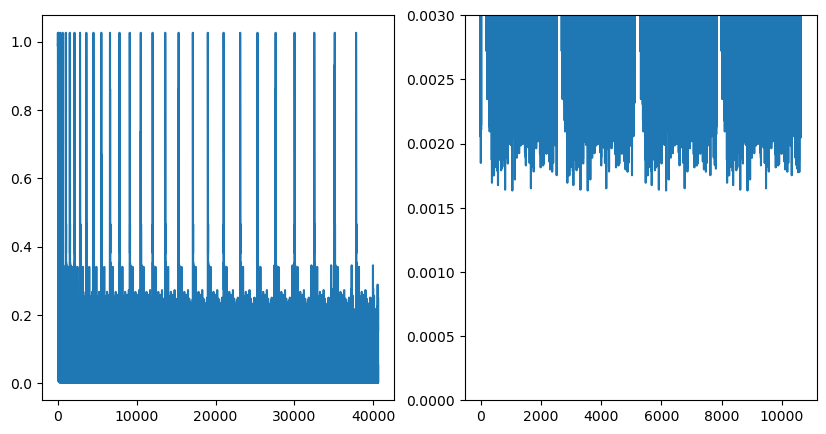

In [20]:
dt = '10312022_010352' 
infile = f'./diffusion logs & models/{dt}/{dt}.log'

loss_progress = []

with open(infile) as f:
    f = f.readlines()

for idx, line in enumerate(f):
    if "loss" in line:
        loss = line.split('=')[1].strip()
        loss_progress.append(float(loss))

    if "Decoder model used" in line and idx > 10:
        break

loss_progress = np.array(loss_progress)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(loss_progress)
axs[1].plot(loss_progress[30000:])
axs[1].set_ylim([0, 0.003])

plt.show()
